<a href="https://colab.research.google.com/github/emmad225/SpotifyPersonalProject/blob/main/Spotify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Import relevant libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [89]:
# List of JSON file names
files = glob.glob('StreamingHistory_music_*.json')

# Empty list to hold data from each file
all_data = []

# Loop through each file and load the data
for file in files:
    with open(file) as f:
        data = json.load(f)
        all_data.extend(data)  # Assuming each file is a list of records

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(all_data)

# Display the first few rows to verify
print(df.head())

# Create new dataframes to calculate seconds and hours
df['secondsPlayed'] = df['msPlayed'] / 1000
df['minutesPlayed'] = df['msPlayed'] / 60000

print(df[['trackName', 'artistName', 'msPlayed', 'secondsPlayed','minutesPlayed']].head())

            endTime     artistName              trackName  msPlayed
0  2024-09-27 14:41  Billie Eilish                  LUNCH     57920
1  2024-09-27 14:41        Rihanna              Needed Me       917
2  2024-09-27 14:41          Quavo                  Tough      6911
3  2024-09-27 14:41  Gracie Abrams                   Risk       960
4  2024-09-27 14:41     The Weeknd  Dancing In The Flames      1429
               trackName     artistName  msPlayed  secondsPlayed  \
0                  LUNCH  Billie Eilish     57920         57.920   
1              Needed Me        Rihanna       917          0.917   
2                  Tough          Quavo      6911          6.911   
3                   Risk  Gracie Abrams       960          0.960   
4  Dancing In The Flames     The Weeknd      1429          1.429   

   minutesPlayed  
0       0.965333  
1       0.015283  
2       0.115183  
3       0.016000  
4       0.023817  


In [90]:
# Check data types and non-null counts
print(df.info())

# Get basic statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32183 entries, 0 to 32182
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   endTime        32183 non-null  object 
 1   artistName     32183 non-null  object 
 2   trackName      32183 non-null  object 
 3   msPlayed       32183 non-null  int64  
 4   secondsPlayed  32183 non-null  float64
 5   minutesPlayed  32183 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB
None
            msPlayed  secondsPlayed  minutesPlayed
count   32183.000000   32183.000000   32183.000000
mean   134932.565174     134.932565       2.248876
std     96563.381169      96.563381       1.609390
min         0.000000       0.000000       0.000000
25%     22547.500000      22.547500       0.375792
50%    160191.000000     160.191000       2.669850
75%    211374.000000     211.374000       3.522900
max    657719.000000     657.719000      10.961983


Unique Songs and Artists

In [91]:
# Unique songs and artists listened to this year
unique_tracks = df['trackName'].nunique()
unique_artists = df['artistName'].nunique()

print(f"Unique tracks: {unique_tracks}")
print(f"Unique artists: {unique_artists}")

Unique tracks: 6141
Unique artists: 1853


Top Songs

In [92]:
# Top songs of the year
top_songs = df.groupby('trackName')['minutesPlayed'].sum().sort_values(ascending= False).head(10)
print("Top Songs:")
for song, minutes in top_songs.items():
    print(f"{song}: {minutes:.2f} minutes")  # Round to two decimal places

# Top artists of the year
top_artists = df.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending= False).head(10)
print("\nTop Artists:")
for artist, minutes in top_artists.items():
    print(f"{artist}: {minutes:.2f} minutes")  # Round to two decimal places

Top Songs:
Rich Baby Daddy (feat. Sexyy Red & SZA): 500.33 minutes
CARNIVAL: 294.70 minutes
Never Lose Me (feat. Lil Yachty): 273.62 minutes
Virginia Beach: 270.26 minutes
Hours In Silence: 226.76 minutes
Down Bad: 212.48 minutes
BIRDS OF A FEATHER: 204.72 minutes
Fresh Out The Slammer: 193.48 minutes
Loveeeeeee Song: 191.00 minutes
Come Thru: 189.78 minutes

Top Artists:
Taylor Swift: 5328.51 minutes
Drake: 4674.61 minutes
Nicki Minaj: 2893.16 minutes
Ariana Grande: 1902.25 minutes
Tate McRae: 1673.94 minutes
Sabrina Carpenter: 1401.02 minutes
SZA: 1288.25 minutes
Rihanna: 1032.54 minutes
Morgan Wallen: 984.17 minutes
Travis Scott: 953.81 minutes


In [93]:
# Convert to datetime
df['endTime'] = pd.to_datetime(df['endTime'])

# Extract date parts: date, month, hour
df['date'] = df['endTime'].dt.date
df['month'] = df['endTime'].dt.month
df['hour'] = df['endTime'].dt.hour

# Check listening pattern by hour
hourly_listening = df.groupby('hour')['minutesPlayed'].sum()
print(hourly_listening)

# Check listening pattern by month
monthly_listening = df.groupby('month')['minutesPlayed'].sum()
print(monthly_listening)

# Check listening pattern by date
daily_listening = df.groupby('date')['minutesPlayed'].sum()
print(daily_listening)

hour
0     3425.775417
1     2616.973567
2     2237.830750
3     1519.819417
4      738.568450
5      287.979467
6      162.496517
7      198.119700
8      115.797517
9      470.214350
10     919.538567
11    1167.508700
12    1953.853850
13    4016.785250
14    5537.889900
15    6182.624967
16    5556.455133
17    5245.320283
18    5294.115117
19    5391.950800
20    5615.213150
21    5063.681867
22    4439.503617
23    4217.562733
Name: minutesPlayed, dtype: float64
month
1     5396.175650
2     7951.477100
3     7048.952550
4     7332.607017
5     5896.342633
6     6192.128167
7     4295.805317
8     4177.374883
9     4810.015400
10    5031.571200
11    7602.321100
12    6640.808067
Name: minutesPlayed, dtype: float64
date
2023-10-23      0.654050
2023-10-27      1.374100
2023-10-28    273.265633
2023-10-29    240.411600
2023-10-30    271.370417
                 ...    
2024-10-24    113.367867
2024-10-25    159.302733
2024-10-26    190.061633
2024-10-27     22.701750
2024-10-28    

In [94]:
# 1. Analyze Skipped Tracks
SKIP_THRESHOLD = 10  # 10 seconds threshold
skipped_tracks = df[df['secondsPlayed'] < SKIP_THRESHOLD].copy()

# Group by track and count skips
skip_counts = skipped_tracks.groupby(['trackName', 'artistName']).size().reset_index()
skip_counts.columns = ['trackName', 'artistName', 'skipCount']

# Sort by skip count in descending order and get top 20
top_skipped = skip_counts.sort_values('skipCount', ascending=False).head(10)

print("\n=== Top 10 Most Skipped Tracks ===")
print(f"Total skipped tracks analyzed: {len(skipped_tracks)}")
print("\nRanking of most skipped songs:")
for idx, track in top_skipped.iterrows():
    print(f"{idx + 1}. '{track['trackName']}' by {track['artistName']} "
          f"(skipped {track['skipCount']} times)")

# Optional: Create a percentage of total skips
total_skips = skip_counts['skipCount'].sum()
top_skipped['skipPercentage'] = (top_skipped['skipCount'] / total_skips * 100)

print("\nDetailed Analysis (including percentages):")
for idx, track in top_skipped.iterrows():
    print(f"{idx + 1}. '{track['trackName']}' by {track['artistName']}")
    print(f"   Skips: {track['skipCount']} ({track['skipPercentage']:.1f}% of total skips)")


=== Top 10 Most Skipped Tracks ===
Total skipped tracks analyzed: 6290

Ranking of most skipped songs:
1422. 'Is It Over Now? (Taylor's Version) (From The Vault)' by Taylor Swift (skipped 13 times)
2656. 'Teenage Fever' by Drake (skipped 12 times)
2789. 'Till Forever Falls Apart' by Ashe (skipped 12 times)
1269. 'I Can Do It With a Broken Heart' by Taylor Swift (skipped 12 times)
2855. 'Type Shit' by Future (skipped 11 times)
2712. 'The Man Who Can't Be Moved' by The Script (skipped 10 times)
3226. 'greedy' by Tate McRae (skipped 10 times)
3339. 'the 1' by Taylor Swift (skipped 10 times)
1540. 'Last Time I Saw You' by Nicki Minaj (skipped 10 times)
822. 'Escapism.' by RAYE (skipped 10 times)

Detailed Analysis (including percentages):
1422. 'Is It Over Now? (Taylor's Version) (From The Vault)' by Taylor Swift
   Skips: 13 (0.2% of total skips)
2656. 'Teenage Fever' by Drake
   Skips: 12 (0.2% of total skips)
2789. 'Till Forever Falls Apart' by Ashe
   Skips: 12 (0.2% of total skips)
1

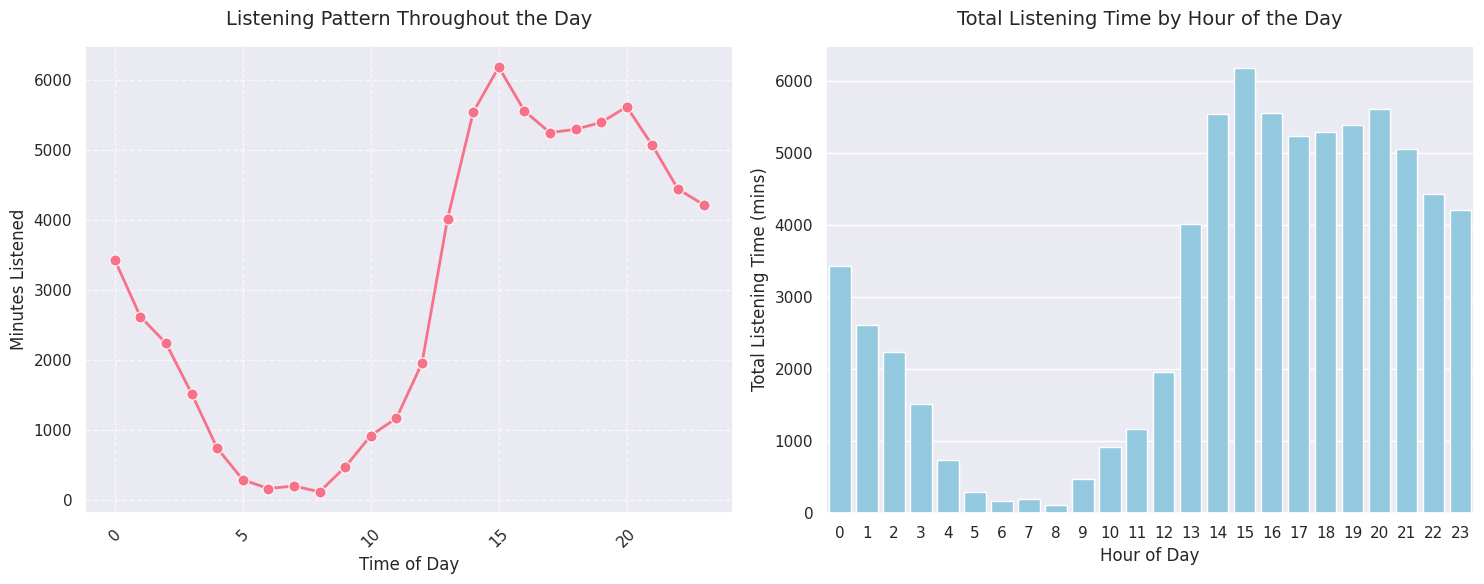

In [95]:
# Set the style for better-looking plots
sns.set_theme()
sns.set_palette("husl")

# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Create the line plot
sns.lineplot(x=hourly_listening.index, y=hourly_listening.values, marker='o', linewidth=2, markersize=8, ax=ax[0])

# Customize the line plot
ax[0].set_title('Listening Pattern Throughout the Day', fontsize=14, pad=15)
ax[0].set_xlabel('Time of Day', fontsize=12)
ax[0].set_ylabel('Minutes Listened', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Create the bar plot
sns.barplot(x=hourly_listening.index, y=hourly_listening.values, color="skyblue", ax=ax[1])

# Customize the bar plot
ax[1].set_title('Total Listening Time by Hour of the Day', fontsize=14, pad=15)
ax[1].set_xlabel('Hour of Day', fontsize=12)
ax[1].set_ylabel('Total Listening Time (mins)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


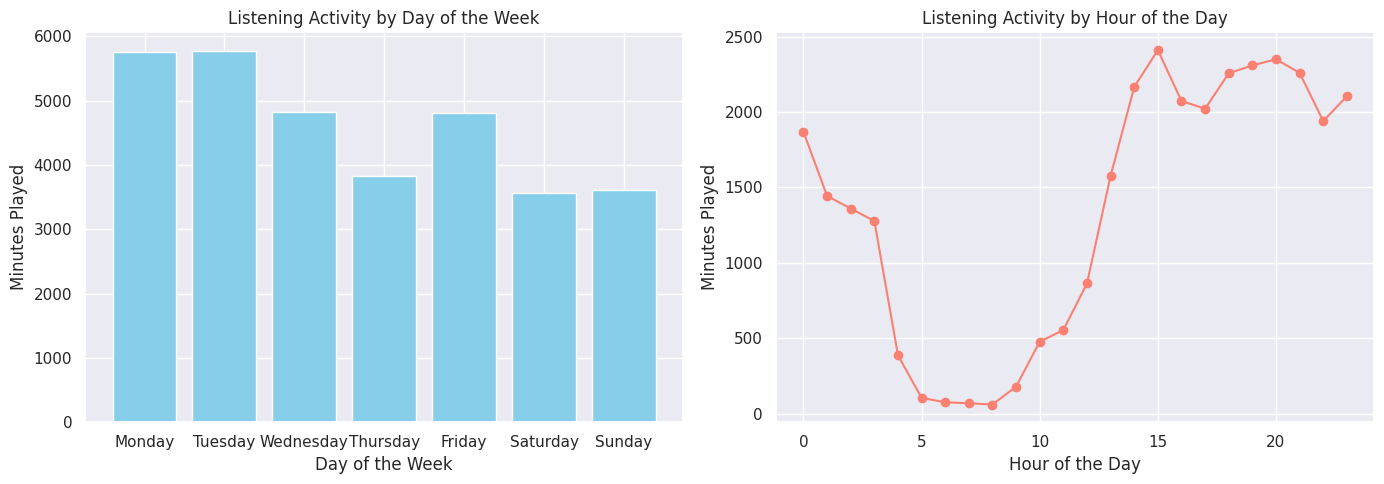

In [96]:
# Extract day of the week and hour from the endTime column

df['dayOfWeek'] = df['endTime'].dt.day_name()
df['hourOfDay'] = df['endTime'].dt.hour

# Group by day of the week and hour to get listening patterns
listening_by_day = df.groupby('dayOfWeek')['msPlayed'].count().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
listening_by_hour = df.groupby('hourOfDay')['msPlayed'].count()

# Plotting listening patterns by day and hour
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Listening pattern by day of the week
axs[0].bar(listening_by_day.index, listening_by_day.values, color='skyblue')
axs[0].set_title('Listening Activity by Day of the Week')
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Minutes Played')

# Listening pattern by hour of the day
axs[1].plot(listening_by_hour.index, listening_by_hour.values, color='salmon', marker='o')
axs[1].set_title('Listening Activity by Hour of the Day')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Minutes Played')

plt.tight_layout()
plt.show()


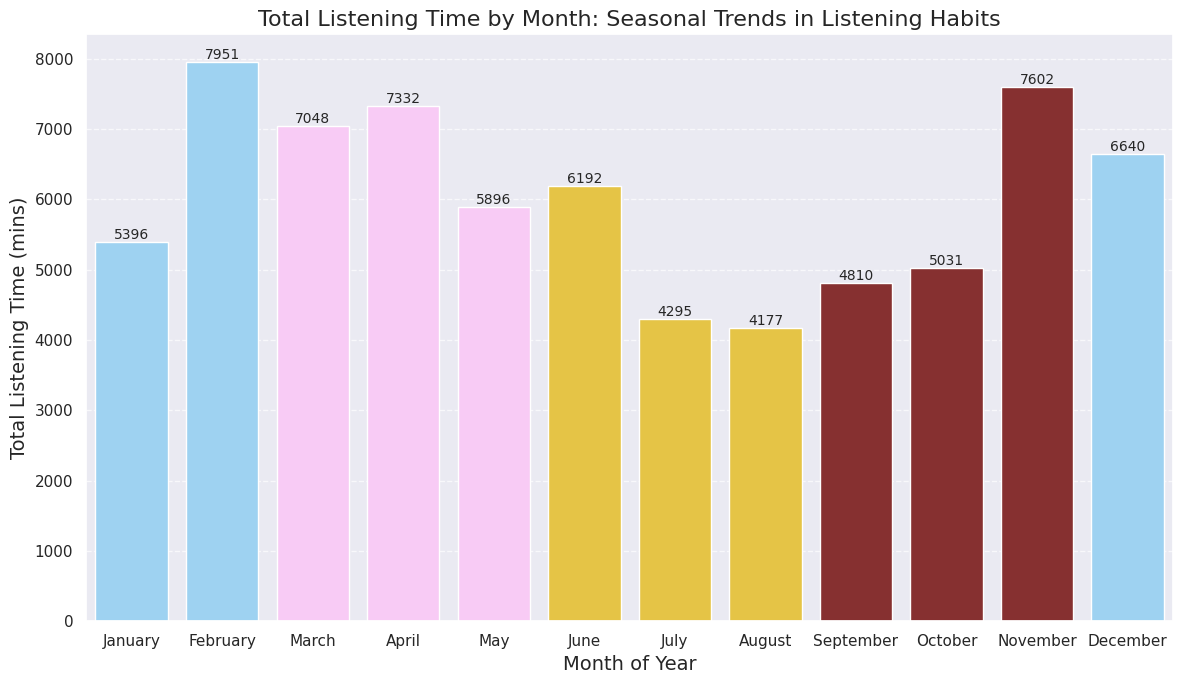

In [97]:
# Define a color mapping for each month based on seasons
season_colors = {
    1: '#90d5ff',   # January (Winter)
    2: '#90d5ff',   # February (Winter)
    3: '#ffc4fb',  # March (Spring)
    4: '#ffc4fb',  # April (Spring)
    5: '#ffc4fb',  # May (Spring)
    6: '#ffd32c',  # June (Summer)
    7: '#ffd32c',  # July (Summer)
    8: '#ffd32c',  # August (Summer)
    9: '#942222',       # September (Autumn)
    10: '#942222',      # October (Autumn)
    11: '#942222',      # November (Autumn)
    12: '#90d5ff'    # December (Winter)
}

# Create a list of colors for the bar plot based on the month index
colors = [season_colors[month] for month in monthly_listening.index]

# Create the plot
plt.figure(figsize=(12, 7))
bars = sns.barplot(x=monthly_listening.index, y=monthly_listening.values, hue=monthly_listening.index, palette=colors, legend=False)

# Add title and labels
plt.title('Total Listening Time by Month: Seasonal Trends in Listening Habits', fontsize=16)
plt.xlabel('Month of Year', fontsize=14)
plt.ylabel('Total Listening Time (mins)', fontsize=14)

# Add data labels above bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize tick labels
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.xticks(ticks=range(len(month_names)), labels=month_names)

plt.tight_layout()  # Adjust layout
plt.show()

month
Autumn    5814.635900
Spring    6759.300733
Summer    4888.436122
Winter    6662.820272
Name: minutesPlayed, dtype: float64


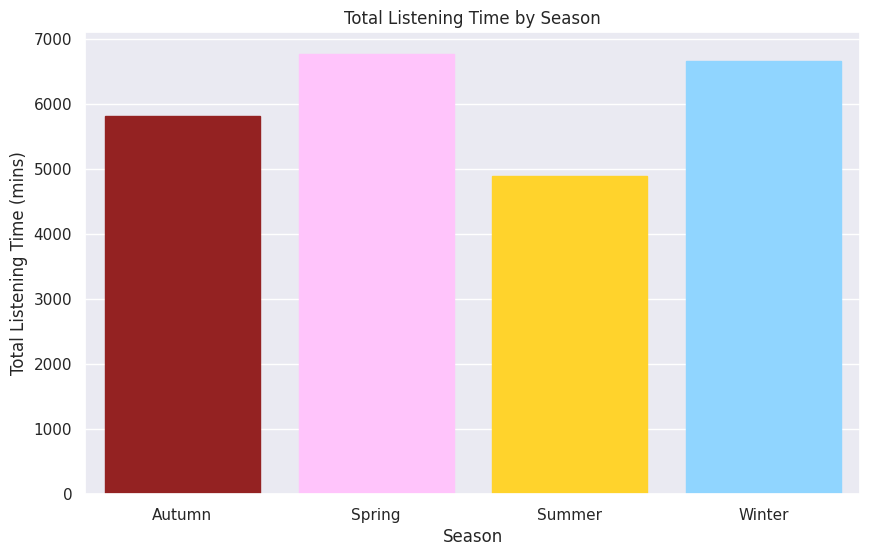

In [98]:
# Define a mapping of months to seasons
season_mapping = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',  # December
    3: 'Spring', 4: 'Spring', 5: 'Spring',   # March, April, May
    6: 'Summer', 7: 'Summer', 8: 'Summer',   # June, July, August
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'   # September, October, November
}

# Create a new DataFrame to calculate average listening time by season
season_listening = monthly_listening.groupby(monthly_listening.index.map(season_mapping)).mean()


# Define a color mapping for each season based on the season_colors dictionary
season_colors = {
    'Winter': '#90d5ff',  # Winter
    'Spring': '#ffc4fb',  # Spring
    'Summer': '#ffd32c',  # Summer
    'Autumn': '#942222'    # Autumn
}

# Create a list of colors for the bar plot based on the season index
colors = [season_colors[season] for season in season_listening.index]

# Print the average listening time by season
print(season_listening)

# Optionally, visualize the average listening time by season
plt.figure(figsize=(10, 6))
sns.barplot(x=season_listening.index, y=season_listening.values, hue=season_listening.index, palette=colors, legend=False)
plt.title('Total Listening Time by Season')
plt.xlabel('Season')
plt.ylabel('Total Listening Time (mins)')

# Manually set the colors
for bar, color in zip(plt.gca().patches, colors):
    bar.set_color(color)

plt.show()

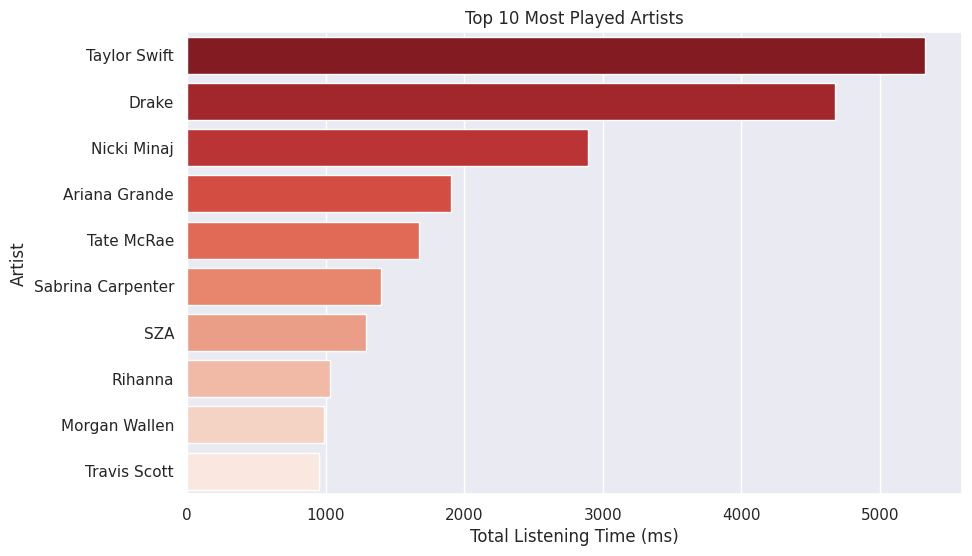

In [99]:
# Visualize top 10 artists
top_artists_df = top_artists.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='minutesPlayed', y='artistName', data=top_artists_df,
            hue='artistName', palette='Reds_r', legend=False)

plt.title('Top 10 Most Played Artists')
plt.xlabel('Total Listening Time (ms)')
plt.ylabel('Artist')
plt.show()

<Figure size 1500x1000 with 0 Axes>

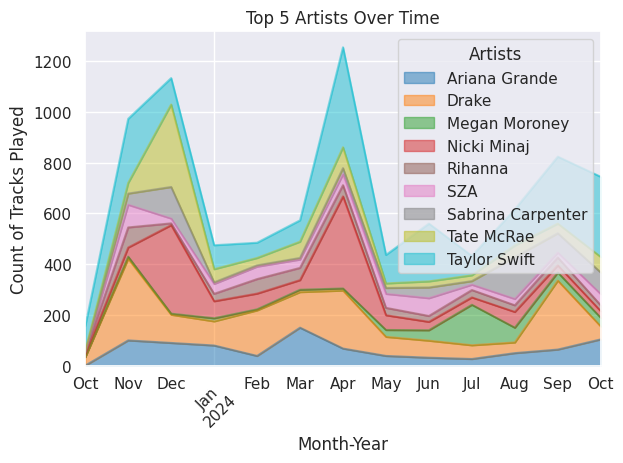

In [100]:
df['monthYear'] = df['endTime'].dt.to_period('M')
top_5_artists = df['artistName'].value_counts().nlargest(9).index
top_artists = df[df['artistName'].isin(top_5_artists)].groupby(['monthYear', 'artistName']).size().unstack(fill_value=0)


# Plotting Top Artists Over Time as an Area Plot
plt.figure(figsize=(15, 10))
top_artists.plot(kind='area', alpha=0.5, colormap='tab10')

plt.title("Top 5 Artists Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Count of Tracks Played")
plt.xticks(rotation=45)
plt.legend(title="Artists")
plt.tight_layout()
plt.show()

In [101]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Define a function to map each month to a season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to the 'month' column to create 'season_listening'
df['season_listening'] = df['month'].map(get_season)

In [102]:
# Print complete dataframe
print(df)
#print(df[['trackName', 'artistName', 'msPlayed', 'secondsPlayed','minutesPlayed', 'dayOfWeek', 'hourOfDay', 'season_listening']].head(10))

                  endTime        artistName  \
0     2024-09-27 14:41:00     Billie Eilish   
1     2024-09-27 14:41:00           Rihanna   
2     2024-09-27 14:41:00             Quavo   
3     2024-09-27 14:41:00     Gracie Abrams   
4     2024-09-27 14:41:00        The Weeknd   
...                   ...               ...   
32178 2024-09-27 14:04:00           Rihanna   
32179 2024-09-27 14:06:00        Charli xcx   
32180 2024-09-27 14:10:00     Gracie Abrams   
32181 2024-09-27 14:38:00  Lost Frequencies   
32182 2024-09-27 14:40:00       Troye Sivan   

                                trackName  msPlayed  secondsPlayed  \
0                                   LUNCH     57920         57.920   
1                               Needed Me       917          0.917   
2                                   Tough      6911          6.911   
3                                    Risk       960          0.960   
4                   Dancing In The Flames      1429          1.429   
...            

In [103]:
# Convert to CSV file to import data for Tableau dashboard
df.to_csv('combined_spotify_data.csv', index=False)